In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

In [58]:
class h_kernel(object):
    def __init__(self, const=3):
        self.const = const
    def __call__(self, theta):
        return np.exp(self.const * theta)
    def d_theta(self, theta):
        return self.const * self.__call__(theta)


h = h_kernel(const=5)

sigma_epsilon = 1e-5 # Variance of observation noise
noise = norm(0, sigma_epsilon)
def y_obv(theta, h, noise=noise):
    obv = h(theta) + noise.rvs(1)
    return obv[0]



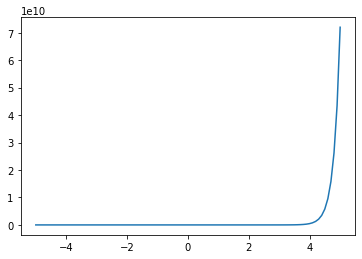

In [59]:
xs = np.linspace(-5, 5, 100)
ys = [h(theta) for theta in xs]
plt.plot(xs, ys)

In [107]:
def get_sigma(mu_old, sigma_old, sigma_epsilon=sigma_epsilon, h=h):
    J = h.d_theta(mu_old)
    left_term = 1 / sigma_old
    right_term = (J**2) / sigma_epsilon

    return 1 / (left_term + right_term)

def get_mu(mu_old, sigma_current, y, mu_prior, sigma_prior,
           sigma_epsilon=sigma_epsilon, h=h):
    J = h.d_theta(mu_old)
    left_term = (J * (y - h(mu_old))) / sigma_epsilon
    right_term = (mu_prior - mu_old) / sigma_prior
    
    return mu_old + sigma_current * (left_term + right_term)


In [121]:
def run_VI(theta_true, mu_prior, sigma_prior, h, num_iter=1000):
    y = y_obv(theta_true, h)

    mu_list, sigma_list = [mu_prior], [sigma_prior]
    mu_i, sigma_i = mu_prior, sigma_prior

    for _ in range(num_iter):
        sigma_i = get_sigma(mu_i, sigma_i, h=h)
        mu_i = get_mu(mu_i, sigma_i, y, mu_prior, sigma_prior, h=h)

        mu_list.append(mu_i)
        sigma_list.append(sigma_i)

    return mu_list, sigma_list, y
    

0.006718840640449702 -0.5863849546195291
12.18249169980454 0.9136507662776439
148.4131661735272 1.4136507692177565


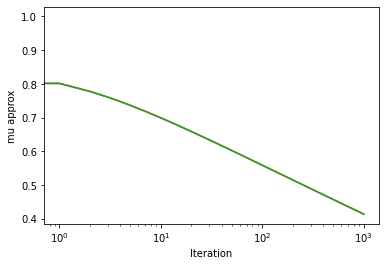

In [131]:
for theta_true in [-1, 0.5, 1]:
    mu_prior = theta_true + 1
    sigma_prior = 1000

    mu_out, sigma_out, y = run_VI(theta_true, mu_prior, sigma_prior, h, num_iter=1000)
    plt.plot(np.array(mu_out) - theta_true, label=f'True mu: {theta_true}')
    print(y, mu_out[-1])
#plt.legend()
plt.xlabel('Iteration')
plt.ylabel('mu approx')
plt.xscale('log')

1.0512528815323081
1.648705103120825
4.481694083083541


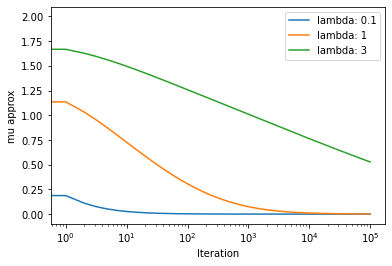

In [136]:
for const in [0.1, 1, 3]:
    theta_true = 0.5
    h_test = h_kernel(const=const)
    mu_prior = theta_true + 2
    sigma_prior = 1000

    mu_out, sigma_out, y = run_VI(theta_true, mu_prior, sigma_prior, h_test, num_iter=100_000)
    plt.plot(np.array(mu_out) - theta_true, label=f'lambda: {const}')
    print(y)
#plt.legend()
plt.xlabel('Iteration')
plt.ylabel('mu approx')
plt.xscale('log')

plt.legend(loc='upper right')
